# PROBLEM 3: Artesian-water table conversion


### Part b)
_Run the problem with the aquifer top set at -2 ft. Note drawdown versus time at a point 1000 ft from the pumping well. Compare to part a.
Since the aquifer top (’TOP) is set to -2 ft, the secondary storage factor (SF2) and aquifer top (TOP) are no longer required. _

### Table 3.2 Grid spacing (ft) used in Problem 3

| Row number i (=column number, j) | DELC(i) (=DELR(j)) |
|----------------------------------|--------------------|
| 1                                | 10                 |
| 2                                | 15                 |
| 3                                | 20                 |
| 4                                | 30                 |
| 5                                | 50                 |
| 6                                | 70                 |
| 7                                | 100                |
| 8                                | 150                |
| 9                                | 200                |
| 10                               | 220                |
| 11                               | 280                |
| 12                               | 300                |
| 13                               | 400                |
| 14                               | 600                |
| 15                               | 800                |
| 16                               | 1000               |
| 17                               | 1500               |
| 18                               | 2000               |
| 19                               | 3000               |
| 20                               | 4000               |
| 21                               | 6000               |
| 22                               | 8000               |
| 23                               | 10000              |
| 24                               | 15000              |
| 25                               | 20000              |
| 26                               | 30000              |

In [1]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import flopy
import csv

print(sys.version)
print('numpy version: {}'.format(np.__version__))
print('matplotlib version: {}'.format(mpl.__version__))
print('flopy version: {}'.format(flopy.__version__))

3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
numpy version: 1.11.3
matplotlib version: 2.0.0
flopy version: 3.2.6


In [2]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table3.2.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
10.0
15.0
20.0
30.0
50.0
70.0
100.0
150.0
200.0
220.0
280.0
300.0
400.0
600.0
800.0
1000.0
1500.0
2000.0
3000.0
4000.0
6000.0
8000.0
10000.0
15000.0
20000.0
30000.0
[10.0, 15.0, 20.0, 30.0, 50.0, 70.0, 100.0, 150.0, 200.0, 220.0, 280.0, 300.0, 400.0, 600.0, 800.0, 1000.0, 1500.0, 2000.0, 3000.0, 4000.0, 6000.0, 8000.0, 10000.0, 15000.0, 20000.0, 30000.0]


[  1.00000000e+01   1.50000000e+01   2.00000000e+01   3.00000000e+01
   5.00000000e+01   7.00000000e+01   1.00000000e+02   1.50000000e+02
   2.00000000e+02   2.20000000e+02   2.80000000e+02   3.00000000e+02
   4.00000000e+02   6.00000000e+02   8.00000000e+02   1.00000000e+03
   1.50000000e+03   2.00000000e+03   3.00000000e+03   4.00000000e+03
   6.00000000e+03   8.00000000e+03   1.00000000e+04   1.50000000e+04
   2.00000000e+04   3.00000000e+04]
103745.0


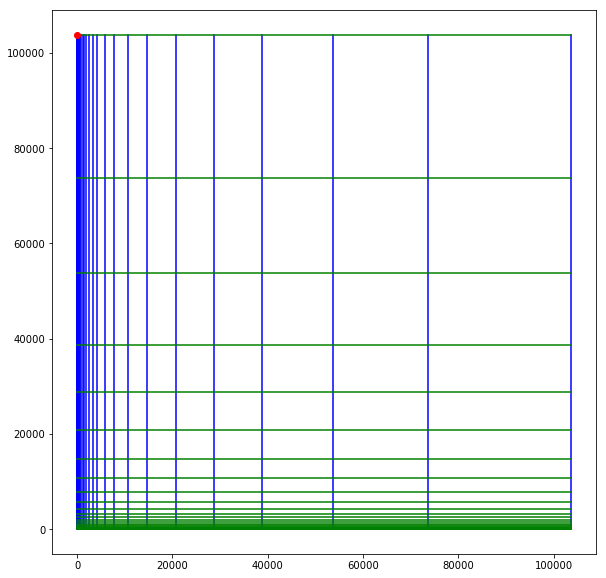

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0
x = 0
y = 0

plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line. Must be outside of the loop

for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymax, ymin], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line. Must be outside of the loop

for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')


def plot_well(xmin, ymax, sym):
    plt.plot(xmin, ymax, sym)
plot_well(xmin, ymax, sym='ro')

### Table 3.1. Parameters used in Problem 3

| Variable | Value  |
|----------------------------|-----------------|
| Initial head                   | 0.0 ft           |
| Transmissivity                 | 2673.8 $\frac{ft^2}{d}$    |
| Storage coefficient (confined) | 0.0001           |
| Specific yield (unconfined)    | 0.1              |
| Pumping rate                   | 33636 $\frac{ft^3}{d}$     |
| Stress period length           | 100 days         |
| Number of time steps           | 25               |
| Time step expansion factor     | 1.44             |
| Iteration parameters           | 5                |
| Closure criterion              | 0.001            |
| Maximum number iterations      | 50               |

In [4]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
trans = 2673.8 #transmissivity (is equal to hk*(top-botm))
ss = 0.0001 #storage coefficient
sy = 0.1 #specific yield
pr = 33636 #pumping rate
perlen = 100 #final time (period length)
nstp = 25 #number of time steps
tsmult = 1.44 #time step expansion factor (time step multiplier)
it = 5 #iteration parameters
hclose = 0.001 #closure criterion (the head change criterion for convergence)
mxiter = 50 #maximum number of iterations

#print values to make sure they are all stored properly
#put in quotes to make a string, .format takes whatever is in the () 
#and changes it to a float, it is then stored in the {}

print('initial head: {}'.format(inh))
print('transmissivity: {} ft^2/d'.format(trans))
print('storage coefficient (confined): {}'.format(ss))
print('specific yield (unconfined): {}'.format(sy))
print('pumping rate: {} ft^3/d'.format(pr))
print('final time: {} s'.format(perlen))
print('number of time steps: {}'.format(nstp))
print('time step expansion factor: {}'.format(tsmult))
print('iteration parameters: {}'.format(it))
print('closure criterion: {}'.format(hclose))
print('maximum number of iterations: {}'.format(mxiter))

initial head: 0.0
transmissivity: 2673.8 ft^2/d
storage coefficient (confined): 0.0001
specific yield (unconfined): 0.1
pumping rate: 33636 ft^3/d
final time: 100 s
number of time steps: 25
time step expansion factor: 1.44
iteration parameters: 5
closure criterion: 0.001
maximum number of iterations: 50


In [16]:
#Flopy objects
modelname = 'p3_pb' #short for problem 3 part b
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [17]:
#call in the discretization package
delr = delr
delc = delr #set delr values equal to delc
top = -2 #an array of the top elevation of layer 1
botm = -3 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
nlay = 1
nrow = 26
ncol = 26
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [18]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = inh
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

In [19]:
#call in the well package (WEL)
quarter_pr = pr * (1/4)
print(quarter_pr)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 0, 0, -quarter_pr]]
stress_period_data = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=stress_period_data)
print(wel_sp1)

8409.0
[[0, 0, 0, -8409.0]]


In [20]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)

In [21]:
#call in the layer-propery flow (LPF)
hk = trans
laytyp = 2
lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, sy=sy, laytyp=laytyp)

In [22]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf)

In [23]:
# Write the MODFLOW model input files
mf.write_input()

In [24]:
# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p3_pb.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/08/17 10:50:43

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Grou

In [25]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p3_pb.hds') #"os.path.join" joins together the model_ws and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head at node (1, 4) for part a (Table 14.2)
ts = headobj.get_ts([[0, 0, 8]])
print(ts)

[0.0048354594, 0.011798522, 0.02182533, 0.036263935, 0.057055525, 0.086995423, 0.13010886, 0.19219223, 0.28159228, 0.41032836, 0.59570831, 0.86265546, 1.2470593, 1.800601, 2.5977011, 3.7455251, 5.3983917, 7.7785196, 11.205904, 16.141338, 23.248363, 33.482479, 48.219608, 69.441071, 99.999985]
[[  4.83545940e-03  -2.34128605e-10]
 [  1.17985215e-02  -1.34199915e-10]
 [  2.18253303e-02  -5.61976993e-11]
 [  3.62639353e-02  -2.80422248e-11]
 [  5.70555255e-02  -1.17965594e-11]
 [  8.69954228e-02  -5.91172380e-12]
 [  1.30108863e-01  -2.49403037e-12]
 [  1.92192227e-01  -1.31977816e-12]
 [  2.81592280e-01  -5.27046776e-13]
 [  4.10328358e-01  -3.23765645e-13]
 [  5.95708311e-01  -1.06891106e-13]
 [  8.62655461e-01  -9.34970485e-14]
 [  1.24705935e+00  -2.64691342e-14]
 [  1.80060101e+00  -3.12025491e-14]
 [  2.59770107e+00  -1.10161836e-14]
 [  3.74552512e+00  -1.14775700e-14]
 [  5.39839172e+00  -4.55327008e-15]
 [  7.77851963e+00  -4.48871473e-15]
 [  1.12059040e+01  -1.86760897e-15]
 [  

(0, 99.999985)

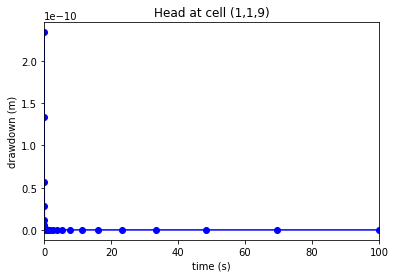

In [26]:
# Plot the drawdown versus time
idx = (0, 0, 8)
ts = headobj.get_ts(idx)
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (s)')
plt.ylabel('drawdown (m)')
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-')
plt.xlim(0, ts[:, 0].max())
#plt.legend(['top at -2 ft'], loc='best')

### MODEL OUTPUT
_Drawdown versus time is tabulated in Table 3.3 and plotted in Figure 3.1 for each of the four cases. The results of parts a and b can also be compared to Moench and Prickett (1972) which is reproduced on the table._

### Table 3.3 Drawdown versus time for each model configuration

| Time step number | Time (days) | Analytical (Aquifer top at -1) | MODFLOW (Aquifer top at -1) | Analytical (Aquifer top at -2) | MODFLOW (Aquifer top at -2) | Confined (S=0.0001) | Unconfined(S=0.1) |
|------------------|-------------|--------------------------------|-----------------------------|--------------------------------|-----------------------------|---------------------|-------------------|
| 1                | 0.0072      | 0.02                           | 0.03                        | 0.04                           | 0.06                        | 0.16                | 0                 |
| 2                | 0.0173      | 0.09                           | 0.09                        | 0.17                           | 0.16                        | 0.47                | 0                 |
| 3                | 0.0317      | 0.16                           | 0.16                        | 0.3                            | 0.28                        | 0.84                | 0                 |
| 4                | 0.052       | 0.23                           | 0.22                        | 0.42                           | 0.41                        | 1.22                | 0                 |
| 5                | 0.0806      | 0.29                           | 0.29                        | 0.55                           | 0.53                        | 1.61                | 0                 |
| 6                | 0.1212      | 0.36                           | 0.36                        | 0.66                           | 0.65                        | 1.98                | 0                 |
| 7                | 0.1785      | 0.42                           | 0.42                        | 0.78                           | 0.78                        | 2.36                | 0                 |
| 8                | 0.2596      | 0.48                           | 0.49                        | 0.9                            | 0.89                        | 2.72                | 0                 |
| 9                | 0.3743      | 0.55                           | 0.55                        | 1.01                           | 1.01                        | 3.08                | 0                 |
| 10               | 0.5364      | 0.61                           | 0.62                        | 1.13                           | 1.13                        | 3.43                | 0                 |
| 11               | 0.7657      | 0.67                           | 0.68                        | 1.24                           | 1.24                        | 3.78                | 0                 |
| 12               | 1.09        | 0.73                           | 0.74                        | 1.35                           | 1.36                        | 4.14                | 0                 |
| 13               | 1.548       | 0.79                           | 0.8                         | 1.46                           | 1.47                        | 4.5                 | 0                 |
| 14               | 2.196       | 0.85                           | 0.86                        | 1.58                           | 1.6                         | 4.85                | 0.01              |
| 15               | 3.113       | 0.91                           | 0.93                        | 1.69                           | 1.7                         | 5.2                 | 0.02              |
| 16               | 4.409       |                                | 1                           | 1.8                            | 1.83                        | 5.55                | 0.05              |
| 17               | 6.241       | 1.03                           | 1.05                        |                                | 1.93                        | 5.9                 | 0.11              |
| 18               | 8.832       | 1.13                           | 0.14                        | 2.02                           | 2.05                        | 6.26                | 0.2               |
| 19               | 12.5        | 1.27                           | 1.27                        | 2.17                           | 2.18                        | 6.61                | 0.33              |
| 20               | 17.68       | 1.46                           | 1.44                        | 2.35                           | 2.35                        | 6.96                | 0.5               |
| 21               | 25          | 1.68                           | 1.65                        | 2.57                           | 2.57                        | 7.37                | 0.71              |
| 22               | 35.36       | 1.93                           | 1.9                         | 2.83                           | 2.83                        | 7.72                | 0.96              |
| 23               | 50.01       | 2.21                           | 2.17                        | 3.1                            | 3.1                         | 8.07                | 1.23              |
| 24               | 70.72       | 2.51                           | 2.46                        | 3.4                            | 3.4                         | 8.42                | 1.52              |
| 25               | 100         | 2.82                           | 2.77                        | 3.71                           | 3.71                        | 8.79                | 1.83              |